## Decision trees

Decision trees are a versatile machine learning algorithm that can perform both classification and regression tasks, and even multi-output tasks. They are also the fundamental components of Random Forests and other ensemble learning methods (Gradient Boosting for example). 

### Training and visualizing a decision tree

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y);

/Users/rory.vigus/.virtualenvs/dev/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


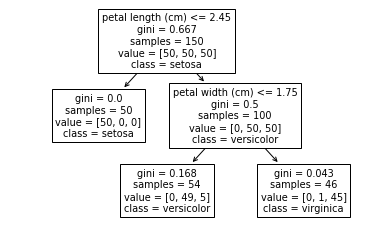

In [47]:
vals = plot_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names)

Root node = top level node

Leaf node = bottom level node

A node samples = how many instances in the training dataset that this node belongs too. 

gini attribute measures its impurity. a node is pure if all instances belong to the same class (gini=0). 

gini impurity:

$ G_i = 1 - \sum^n_{k=1}p_{i, k}^2$

where $p_{i, k}$ is the ratio of class k instances amount the training instances in the ith node.

for example:
1 - (0/54)^2 - (49/54)^2 - (5/54)^2

(1.0, 6.9)

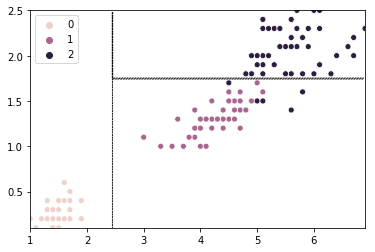

In [77]:
fig, ax = plt.subplots(1, 1)
sns.scatterplot(X[:, 0], X[:, 1], hue=y.ravel(), ax=ax);

# Simulate new X features that will cover plot.
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax.contour(xx, yy, Z, colors=["k"], linestyles=["--"], linewidths=[0.5])
ax.set_ylim((y_min, y_max))
ax.set_xlim((x_min, x_max))

**Estimating class probabilities**

Decision trees can also estimate the probability that an instance belongs to a particular class k. 

First we traverse the tree to find the leaf node for this instance, then it returns the ratio of training instances of class k in this node. For example, if petal length = 5cm and width = 1.5cm, find the following node and we get (0/54)=Iris setosa, (49/54)=Iris veriscolor, (5/54)=Iris virginica.





## Regularization Hyperparameters

Decision trees make very few assumptions about the training data, if left unconstrained the tree structure will adapt itself to the training data and will probably end up overfitting. Such models are called *nonparametric* models because the number of parameters are not chosen prior to fitting. (Contrast this to parametric models like Linear Regression. Number of parameters is defined prior to fitting).

To avoid overfitting decision trees during training we can:
* reduce the depth of the tree (max_depth)
* increase the minimum number of samples needed on a node before a further split can take place (min_samples_split)
* increase the minimum number of samples a leaf node can have (min_samples_leaf)
* reduce the number of features that are evaluated for splitting at each node (max_features)
* reduce the maximum number of leaf nodes (max_leaf_nodes)

In [6]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

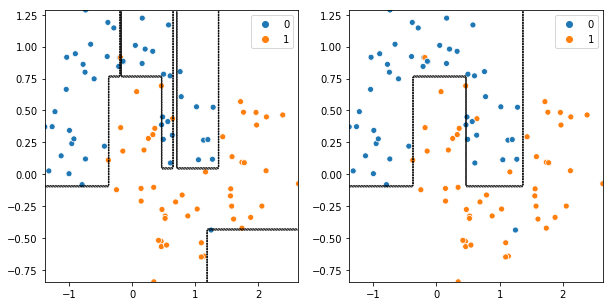

In [11]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=53)

unreg_tree = DecisionTreeClassifier(random_state=42)
reg_tree = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
unreg_tree.fit(X, y)
reg_tree.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for mod, ax in zip([unreg_tree, reg_tree], axes.flat):
    
    # Make scatter
    sns.scatterplot(X[:, 0], X[:, 1], hue=y.ravel(), ax=ax)
    
    # Plot decision boundaries
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = mod.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contour(xx, yy, Z, colors=["k"], linestyles=["--"], linewidths=[0.5])
    ax.set_ylim((y_min, y_max))
    ax.set_xlim((x_min, x_max))

Here we can see the difference between an unregularized model (left) and a regularized model (right). The regularized model has a condition on the minimum number of samples that can be at each leaf, this stops spurious splits being made, and we get a more generalizable fit. 

### Decison trees for regression

We can also use decison trees for regression. Instead of predicting a class in each node, it predicts a value. The predicted value is the average target value of the training instances at this leaf node. 

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y);

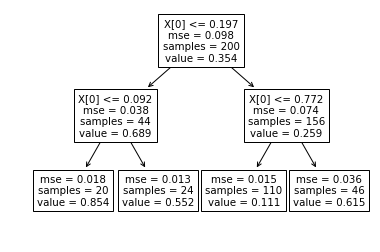

In [17]:
plot_tree(tree_reg);

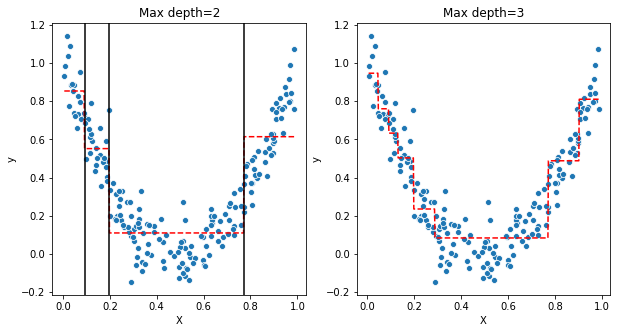

In [49]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg2 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(list(X), list(y), ax=ax1)

# Created ordered x to give to model
x_min, x_max = X[:, 0].min(), X[:, 0].max()
x1 = np.linspace(x_min, x_max, 500).reshape(-1, 1)
preds = tree_reg1.predict(x1)
ax1.plot(x1, preds, color='r', ls='--')
ax1.set_xlabel("X")
ax1.set_ylabel("y")
ax1.set_title("Max depth=2")

# Plot depth lines
ax1.axvline(x=0.197, c='k', label='depth 0')
ax1.axvline(x=0.092, c='k', label='depth 1')
ax1.axvline(x=0.772, c='k', label='depth 1') # corresponds to the split value on the tree.


sns.scatterplot(list(X), list(y), ax=ax2)
preds2 = tree_reg2.predict(x1)
ax2.plot(x1, preds2, color='r', ls='--')
ax2.set_xlabel("X")
ax2.set_ylabel("y")
ax2.set_title("Max depth=3");


Here we can see that the red line is the average of the observations closest to it. As we increase depth, groups get smaller (increase variance).

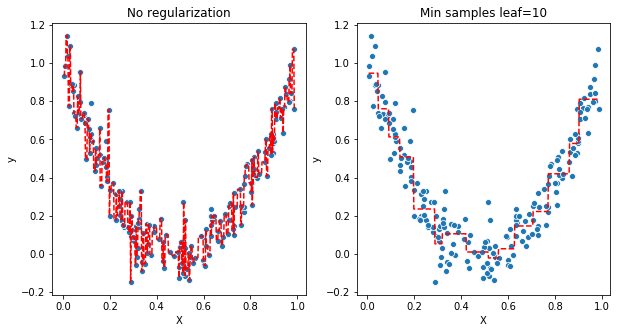

In [50]:
tree_reg1 = DecisionTreeRegressor()
tree_reg2 = DecisionTreeRegressor(min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(list(X), list(y), ax=ax1)

# Created ordered x to give to model
x_min, x_max = X[:, 0].min(), X[:, 0].max()
x1 = np.linspace(x_min, x_max, 500).reshape(-1, 1)
preds = tree_reg1.predict(x1)
ax1.plot(x1, preds, color='r', ls='--')
ax1.set_xlabel("X")
ax1.set_ylabel("y")
ax1.set_title("No regularization")

sns.scatterplot(list(X), list(y), ax=ax2)
preds2 = tree_reg2.predict(x1)
ax2.plot(x1, preds2, color='r', ls='--')
ax2.set_xlabel("X")
ax2.set_ylabel("y")
ax2.set_title("Min samples leaf=10");

Here we can see that regression trees are also prone to overfitting. We control this in the same way with regularization params. 